# Практичне заняття на тему
# «Лінійний парний регресійний аналіз даних. Оцінка метричних показників»

## Мета

Метою заняття є ознайомлення здобувачів вищої освіти з основами лінійного парного регресійного аналізу даних та методикою оцінка його метричних показників.

У процесі виконання практичного заняття здобувачі вищої освіти вивчатимуть методи побудови лінійної регресійної моделі, визначатимуть зв'язки між змінними та виконуватимуть оцінку точності моделі за допомогою різних метричних показників, таких як коефіцієнт детермінації, середньоквадратична похибка та інші.

## Завдання.

За спостережуваними даними побудувати рівняння лінійної регресії методом найменших квадратів.

Графічно представити результати лінії регресії та спостережувані дані. Виконати інтерпретацію коефіцієнтів моделі, оцінити якість побудованої моделі, використовуючи різні характеристики:

* коефіцієнт кореляції;
* коефіцієнт детермінації;
* стандартну похибку регресії;
* довірчі інтервали для коефіцієнтів регресії та для прогнозних значень;
* усереднений коефіцієнт еластичності.

## Опис вихідних даних для побудови лінійної парної регресійної моделі

Відповідно до умови завдання, ми використовуємо дані для 4 варіанту:
- $a_0 = 3,4$
- $a_1 = 2,7$
- $rnd(b) = 1,10$

Модель для генерації даних: $y(x) = a_0 + a_1 x + rnd(b)$

In [1]:
# Побудови графіку лінійного рівняння
import numpy as np
import matplotlib.pyplot as plt

# Параметри моделі для 4 варіанту
a0 = 3.4
a1 = 2.7

# Створюємо масив значень x
n = 51  # Кількість точок
x = np.linspace(0, 5, n)
print(f'{x = }')

x = array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])


In [2]:
# Обчислюємо значення функції y(x) = a0*x + a1
y = a0 * x + a1

print(f'y(x) = {y}')

y(x) = [ 2.7   3.04  3.38  3.72  4.06  4.4   4.74  5.08  5.42  5.76  6.1   6.44
  6.78  7.12  7.46  7.8   8.14  8.48  8.82  9.16  9.5   9.84 10.18 10.52
 10.86 11.2  11.54 11.88 12.22 12.56 12.9  13.24 13.58 13.92 14.26 14.6
 14.94 15.28 15.62 15.96 16.3  16.64 16.98 17.32 17.66 18.   18.34 18.68
 19.02 19.36 19.7 ]


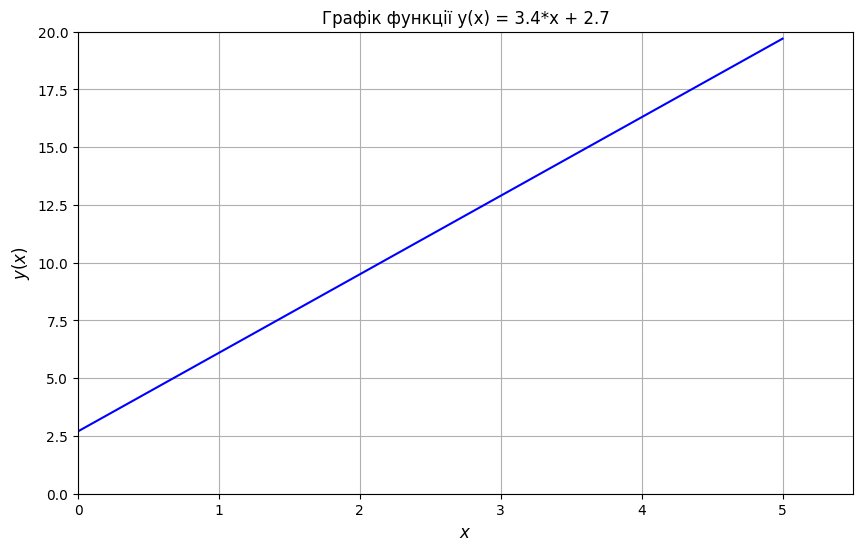

In [3]:
# Будуємо графік
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
plt.xlim(0, 5.5)
plt.ylim(0, 20)
plt.grid(True)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y(x)$', fontsize=12)
plt.title('Графік функції y(x) = 3.4*x + 2.7')
plt.show()

## Генерація даних з шумом

Тепер згенеруємо дані для нашого варіанту завдання з додаванням випадкового шуму. Це дозволить нам змоделювати реальні спостережувані дані, які завжди містять певний елемент випадковості.

Стандартне відхилення (або середньоквадратичне відхилення) нормального розподілу приймаємо згідно завдання $rnd(b) = 1,10$.

In [4]:
# Генерація даних з шумом для нашого варіанту

# Встановлюємо seed для відтворюваності результатів
np.random.seed(42)


rnd_b = 1.10

# Генеруємо випадковий шум із стандартним відхиленням rnd_b
noise = np.random.normal(0, rnd_b, size=n)
print(f'{noise = }')

noise = array([ 0.54638557, -0.15209073,  0.71245739,  1.67533284, -0.25756871,
       -0.25755065,  1.7371341 ,  0.8441782 , -0.51642182,  0.59681605,
       -0.50975946, -0.51230273,  0.2661585 , -2.10460827, -1.89740962,
       -0.61851628, -1.11411423,  0.34567207, -0.99882648, -1.55353407,
        1.61221365, -0.24835393,  0.07428103, -1.567223  , -0.598821  ,
        0.12201485, -1.26609294,  0.41326782, -0.66070256, -0.32086312,
       -0.66187727,  2.037506  , -0.01484695, -1.16348202,  0.9047994 ,
       -1.34292801,  0.22974995, -2.15563714, -1.46100465,  0.21654736,
        0.81231324,  0.18850511, -0.12721311, -0.33121407, -1.62637419,
       -0.79182863, -0.50670265,  1.16283445,  0.37798012, -1.93934417,
        0.35649237])


In [5]:
# Обчислюємо значення y за моделлю з шумом
y = a0 + a1 * x + noise

print(f'y(x) = {y}')

y(x) = [ 3.94638557  3.51790927  4.65245739  5.88533284  4.22243129  4.49244935
  6.7571341   6.1341782   5.04357818  6.42681605  5.59024054  5.85769727
  6.9061585   4.80539173  5.28259038  6.83148372  6.60588577  8.33567207
  7.26117352  6.97646593 10.41221365  8.82164607  9.41428103  8.042777
  9.281179   10.27201485  9.15390706 11.10326782 10.29929744 10.90913688
 10.83812273 13.807506   12.02515305 11.14651798 13.4847994  11.50707199
 13.34974995 11.23436286 12.19899535 14.14654736 15.01231324 14.65850511
 14.61278689 14.67878593 13.65362581 14.75817137 15.31329735 17.25283445
 16.73798012 14.69065583 17.25649237]


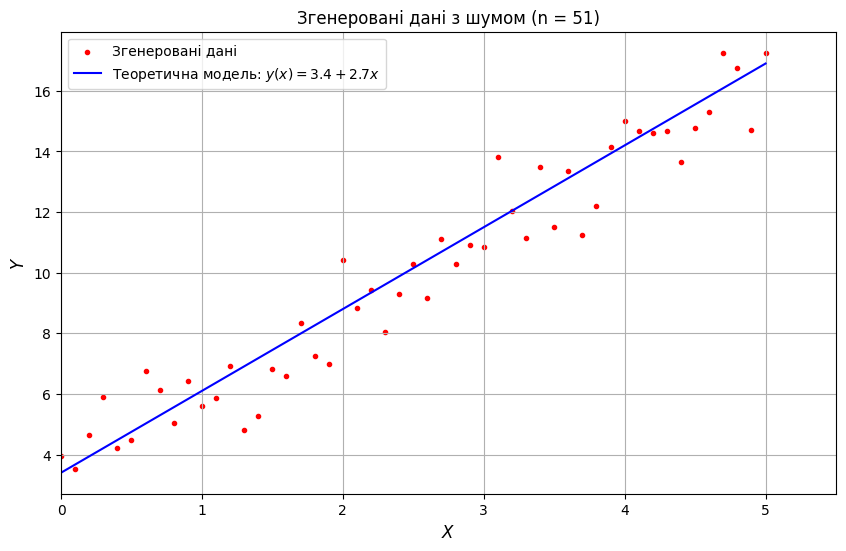

In [6]:
# Будуємо графік
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', marker='.', label='Згенеровані дані')
plt.plot(x, a0 + a1 * x, color='blue', label=f'Теоретична модель: $y(x) = {a0} + {a1}x$')
plt.xlim(0, 5.5)
plt.grid(True)
plt.xlabel('$X$', fontsize=12)
plt.ylabel('$Y$', fontsize=12)
plt.title(f'Згенеровані дані з шумом (n = {n})')
plt.legend()
plt.show()

## Побудова лінійної парної регресійної моделі для залежності між змінними

Для побудови лінійної регресійної моделі використовується метод найменших квадратів.

## Розрахунок параметрів лінійної регресії методом найменших квадратів

### Обчислення середніх значень

1. Обчислення середнього значення залежної змінної: $$y_{ср} = \frac{1}{n} \cdot \sum_{i=0}^{n-1} Y_i$$

In [7]:

y_ср = np.mean(y)

print(f"Середнє значення y: y_ср = {y_ср:.3f}")

Середнє значення y: y_ср = 9.914


2. Обчислення середнього значення незалежної змінної: $$x_{ср} = \frac{1}{n} \cdot \sum_{i=0}^{n-1} X_i$$

In [8]:
x_ср = np.mean(x)

print(f"Середнє значення x: x_ср = {x_ср:.3f}")

Середнє значення x: x_ср = 2.500


3. Обчислення середнього значення квадратів незалежної змінної: $$x^2_{ср} = \frac{1}{n} \cdot \sum_{i=0}^{n-1} X_i^2$$

In [9]:
x2_ср = np.mean(x**2)

print(f"Середнє значення x²: x²_ср = {x2_ср:.3f}")

Середнє значення x²: x²_ср = 8.417


4. Обчислення середнього значення добутків змінних: $$xy_{ср} = \frac{1}{n} \cdot \sum_{i=0}^{n-1} X_i \cdot Y_i$$

In [10]:
xy_ср = np.mean(x*y)

print(f"Середнє значення xy: xy_ср = {xy_ср:.3f}")

Середнє значення xy: xy_ср = 30.398


### Розрахунок коефіцієнтів регресії

5. Розрахунок коефіцієнта нахилу лінії регресії: $$a_1 = \frac{xy_{ср} - x_{ср} \cdot y_{ср}}{x^2_{ср} - x_{ср}^2}$$

In [11]:
a1 = (xy_ср - x_ср * y_ср) / (x2_ср - x_ср**2)

print(f"Коефіцієнт нахилу: a1 = {a1:.3f}")

Коефіцієнт нахилу: a1 = 2.591


6. Розрахунок вільного члена лінії регресії: $$a_0 = y_{ср} - a_1 \cdot x_{ср}$$

In [12]:
a0 = y_ср - a1 * x_ср

print(f"Вільний член: a0 = {a0:.3f}")

Вільний член: a0 = 3.436


Таким чином рівняння лінійоної регресії:

In [13]:
print(f"Рівняння регресії: y(x) = {a0:.3f} + {a1:.3f} * x")

Рівняння регресії: y(x) = 3.436 + 2.591 * x


### $y(x) = 3.436 + 2.591 \cdot x$

## Обчислення прогнозних значень

In [14]:
y_pred = a0 + a1 * x

print(f'Прогнозне y(x) = {y_pred}')

Прогнозне y(x) = [ 3.43628294  3.6953849   3.95448686  4.21358882  4.47269078  4.73179274
  4.9908947   5.24999665  5.50909861  5.76820057  6.02730253  6.28640449
  6.54550645  6.80460841  7.06371037  7.32281232  7.58191428  7.84101624
  8.1001182   8.35922016  8.61832212  8.87742408  9.13652604  9.395628
  9.65472995  9.91383191 10.17293387 10.43203583 10.69113779 10.95023975
 11.20934171 11.46844367 11.72754563 11.98664758 12.24574954 12.5048515
 12.76395346 13.02305542 13.28215738 13.54125934 13.8003613  14.05946325
 14.31856521 14.57766717 14.83676913 15.09587109 15.35497305 15.61407501
 15.87317697 16.13227893 16.39138088]


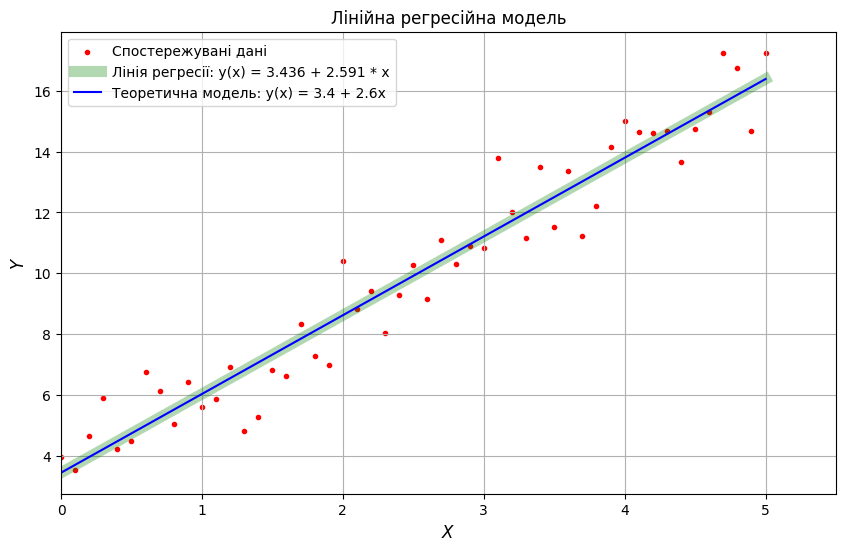

In [15]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', marker='.', label='Спостережувані дані')
plt.plot(x, y_pred, color='green', linewidth=8, alpha=0.3, label=f'Лінія регресії: y(x) = {a0:.3f} + {a1:.3f} * x')
plt.plot(x, a0 + a1 * x, color='blue', linestyle='-', label=f'Теоретична модель: y(x) = {a0:.1f} + {a1:.1f}x')
plt.xlim(0, 5.5)
plt.grid(True)
plt.xlabel('$X$', fontsize=12)
plt.ylabel('$Y$', fontsize=12)
plt.title('Лінійна регресійна модель')
plt.legend()
plt.show()

## Структура набору даних для аналізу

Для нашого варіанту 4 використовуємо наступні параметри:
- Кількість точок даних: $n = 51$
- Діапазон значень X: від 0 до 5
- Значення Y генеруються за формулою: $Y_i = a_0 + a_1 \cdot X_i + rnd(b)$
  - $a_0 = 3.4$ (вільний член)
  - $a_1 = 2.7$ (коефіцієнт при X)
  - $rnd(b) = 1.10$ (стандартне відхилення шуму)

Структура даних представлена у вигляді матриці, де перший стовпець містить значення X, а другий стовпець - значення Y.

Для нашого варіанту 4 сформуємо аналогічну таблицю даних з початковими значеннями:

In [16]:
# Створення таблиці даних для аналізу
# Для 4 варіанту: a₀ = 3.4, a₁ = 2.7, rnd(b) = 1.10

# Формуємо датафрейм з наших даних
import pandas as pd

# Створюємо датафрейм
data = pd.DataFrame({'X': x, 'Y': y})

# Виводимо перші 15 рядків даних
print("Структура набору даних для аналізу:")
print(data.head(15))

# Збережемо датафрейм для подальшого аналізу
# Для використання в наступних розрахунках
X = data['X']
Y = data['Y']

# Можемо також обчислити основні статистичні показники
print("\nСтатистичні характеристики даних:")
print(data.describe())

Структура набору даних для аналізу:
      X         Y
0   0.0  3.946386
1   0.1  3.517909
2   0.2  4.652457
3   0.3  5.885333
4   0.4  4.222431
5   0.5  4.492449
6   0.6  6.757134
7   0.7  6.134178
8   0.8  5.043578
9   0.9  6.426816
10  1.0  5.590241
11  1.1  5.857697
12  1.2  6.906158
13  1.3  4.805392
14  1.4  5.282590

Статистичні характеристики даних:
               X          Y
count  51.000000  51.000000
mean    2.500000   9.913832
std     1.486607   3.981356
min     0.000000   3.517909
25%     1.250000   6.516351
50%     2.500000  10.272015
75%     3.750000  13.569213
max     5.000000  17.256492


## Візуалізація згенерованих даних

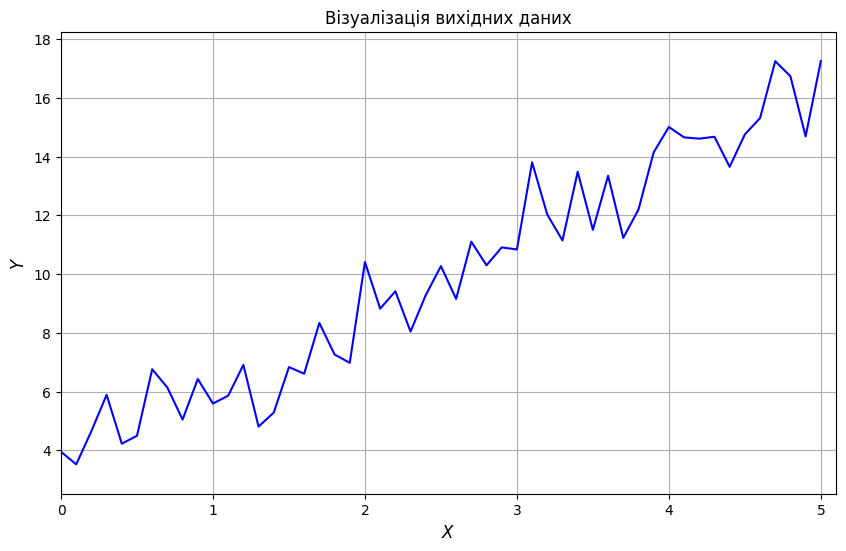

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')  # З'єднуємо точки синьою лінією
plt.xlim(0, 5.1)
plt.ylim(min(y) - 1, max(y) + 1)  # Налаштовуємо масштаб осі Y
plt.grid(True)
plt.xlabel('$X$', fontsize=12)
plt.ylabel('$Y$', fontsize=12)
plt.title('Візуалізація вихідних даних')
plt.show()

## Оцінка якості регресійної моделі

Для нашого варіанту 4 ми отримали:
- Рівняння регресії: $y = 3.436 + 2.591 \cdot x$

Потрібно обчислити показники якості моделі.

Для оцінки якості регресійної моделі використовуються різні метрики. Однією з найважливіших є середньоквадратична похибка (Mean Squared Error, MSE):

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

де:
- $n$ — кількість спостережень
- $y_i$ — фактичне значення залежної змінної для $i$-го спостереження
- $\hat{y}_i$ — прогнозоване значення залежної змінної для $i$-го спостереження, обчислене за допомогою регресійної моделі $\hat{y}_i = a_0 + a_1 x_i$

Або $$MSE = \frac{1}{n} \cdot \sum_{i=0}^{n-1} (Y_i - (a_0 + a_1 \cdot X_i))^2$$

MSE показує середній квадрат різниці між фактичними та прогнозованими значеннями. Чим менше значення MSE, тим краще модель апроксимує дані.

Також часто використовується корінь із середньоквадратичної похибки (Root Mean Squared Error, RMSE):

$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

RMSE має ту ж розмірність, що й залежна змінна, що полегшує інтерпретацію похибки.

Для нашої моделі розрахунок виконується наступним чином:
1. Обчислюємо прогнозовані значення $\hat{y}_i = a_0 + a_1 x_i$ для кожного $x_i$
2. Знаходимо різницю між фактичними та прогнозованими значеннями $(y_i - \hat{y}_i)$
3. Підносимо ці різниці до квадрату $(y_i - \hat{y}_i)^2$
4. Обчислюємо середнє значення цих квадратів, отримуючи MSE
5. Беремо квадратний корінь із MSE, отримуючи RMSE


На графіку покажемо фактичні дані (синя ламана лінія) та лінію регресії (пряма), яка найкраще апроксимує ці дані.

Обчислимо показники якості для нашої моделі регресії:

In [18]:
# Виведення результатів
print(f"Рівняння регресії: y = {a0:.3f} + {a1:.3f} * x")

Рівняння регресії: y = 3.436 + 2.591 * x


In [19]:
# Обчислення середньоквадратичної похибки
mse = np.mean((y - y_pred)**2)  # Mean Squared Error

print(f"Середньоквадратична похибка (MSE): {mse:.4f}")

Середньоквадратична похибка (MSE): 0.9947


In [20]:
# Обчислення кореня з середньоквадратичної похибки
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Корінь із середньоквадратичної похибки (RMSE): {rmse:.4f}")

Корінь із середньоквадратичної похибки (RMSE): 0.9974


### Візуалізація результатів регресії

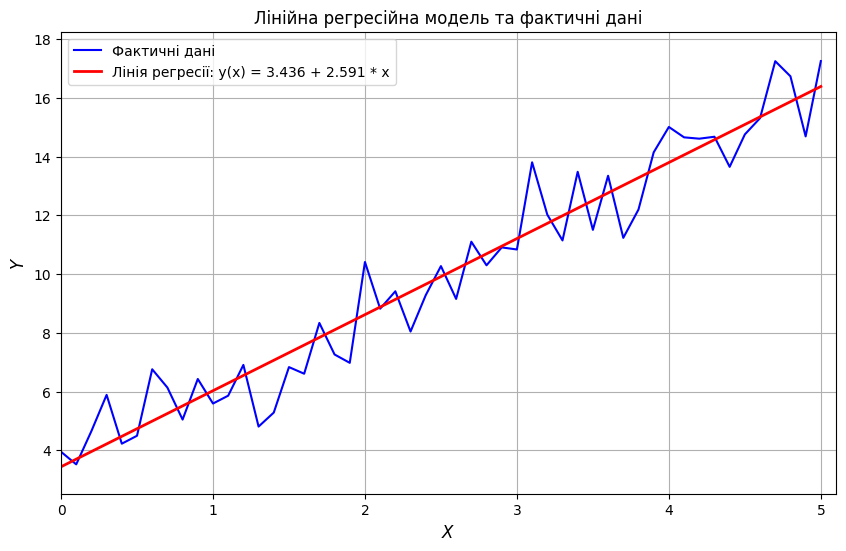

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Фактичні дані')
plt.plot(x, y_pred, 'r-', linewidth=2, label=f'Лінія регресії: y(x) = {a0:.3f} + {a1:.3f} * x')
plt.xlim(0, 5.1)
plt.ylim(min(y) - 1, max(y) + 1)
plt.grid(True)
plt.xlabel('$X$', fontsize=12)
plt.ylabel('$Y$', fontsize=12)
plt.title('Лінійна регресійна модель та фактичні дані')
plt.legend()
plt.show()

### Коефіцієнт кореляції

Наступним кроком є розрахунок коефіцієнта кореляції Пірсона, який вимірює силу лінійного зв'язку між змінними X та Y. Коефіцієнт кореляції обчислюється за формулою:

$$r_{xy} = \frac{\frac{1}{n} \cdot \sum_{i=0}^{n-1} (X_i - x_{sr}) \cdot (Y_i - y_{sr})}{\sqrt{\frac{1}{n} \cdot \sum_{i=0}^{n-1} (X_i - x_{sr})^2} \cdot \sqrt{\frac{1}{n} \cdot \sum_{i=0}^{n-1} (Y_i - y_{sr})^2}}$$

Також проводиться статистична перевірка значущості коефіцієнта кореляції за допомогою t-критерію:

$$t_{сп} = \sqrt{\frac{r_{xy}^2}{1-r_{xy}^2} \cdot (n-2)}$$

Коефіцієнт кореляції вважається статистично значущим, якщо $t_{сп} > t_{кр}$, де $t_{кр}$ - критичне значення t-розподілу при заданому рівні значущості $\alpha$.

Реалізуємо розрахунок коефіцієнта кореляції та його статистичну перевірку для нашого варіанту 4:

In [22]:
# Розрахунок коефіцієнта кореляції
from scipy import stats

### Обчислення коефіцієнта кореляції Пірсона

In [23]:
r_xy, p_value = stats.pearsonr(x, y)

print(f"Коефіцієнт кореляції: r_xy = {r_xy:.4f}")
print(f"p-значення: {p_value:.10f}")

Коефіцієнт кореляції: r_xy = 0.9675
p-значення: 0.0000000000


### Обчислення t-статистики

In [24]:
t_сп = r_xy * np.sqrt((n - 2) / (1 - r_xy**2))

print(f"t-статистика: t_сп = {t_сп:.4f}")

t-статистика: t_сп = 26.7678


### Визначення критичного значення t-розподілу

In [27]:
alpha = 0.05  # рівень значущості
t_кр = stats.t.ppf(1 - alpha/2, n - 2)  # двосторонній критерій

print(f"Критичне значення t-розподілу (α = {alpha}): t_кр = {t_кр:.4f}")

Критичне значення t-розподілу (α = 0.05): t_кр = 2.0096


###  Висновок

In [26]:
print(f"Коефіцієнт кореляції є статистично {'значущим' if abs(t_сп) > t_кр else 'незначущим'}")

Коефіцієнт кореляції є статистично значущим
